In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1. 데이터 로드
def load_data(file_path):
    """처리된 농산물 월별 가격 데이터를 로드합니다."""
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    return df

# 2. 각 품목별 예측 데이터셋 구성
def prepare_product_data(df, product_name):
    """특정 품목의 예측 데이터셋을 구성합니다."""
    product_df = df[df['product'] == product_name].copy()
    product_df = product_df.sort_values('date')
    
    # 결측치 처리
    for col in ['ma_3', 'ma_6', 'ma_12', 'monthly_change', 'yearly_change', 'volatility']:
        if col in product_df.columns:
            product_df[col] = product_df[col].fillna(0)
    
    return product_df

In [4]:
# 3. 모델 평가 지표 계산
def evaluate_model(y_true, y_pred, model_name):
    """모델 성능 평가 지표를 계산합니다."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    return {
        'model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

16:19:49 - cmdstanpy - INFO - Chain [1] start processing


데이터 로드 중...

사과 예측 시작...
모델 교차 검증 중...


16:19:50 - cmdstanpy - INFO - Chain [1] done processing
16:19:50 - cmdstanpy - INFO - Chain [1] start processing
16:19:50 - cmdstanpy - INFO - Chain [1] done processing
16:19:50 - cmdstanpy - INFO - Chain [1] start processing
16:19:50 - cmdstanpy - INFO - Chain [1] done processing



모델 성능 비교:
     model          MAE         RMSE       MAPE         R2
0  Prophet  1796.657473  1943.597508  40.512637 -26.293554
1  XGBoost  1091.894746  1182.201897  24.313683 -10.938792

최적 모델: XGBoost (MAPE: 24.31%)
2025년 월별 가격 예측 중...


16:19:51 - cmdstanpy - INFO - Chain [1] start processing


사과 예측 완료 및 그래프 저장

감귤 예측 시작...
모델 교차 검증 중...


16:19:51 - cmdstanpy - INFO - Chain [1] done processing
16:19:51 - cmdstanpy - INFO - Chain [1] start processing
16:19:52 - cmdstanpy - INFO - Chain [1] done processing
16:19:52 - cmdstanpy - INFO - Chain [1] start processing
16:19:52 - cmdstanpy - INFO - Chain [1] done processing
16:19:52 - cmdstanpy - INFO - Chain [1] start processing



모델 성능 비교:
     model          MAE         RMSE        MAPE        R2
0  Prophet  1041.152370  1233.711296   23.652020 -0.016976
1  XGBoost  3091.631628  3452.781636  108.184072 -4.945104

최적 모델: Prophet (MAPE: 23.65%)
2025년 월별 가격 예측 중...


16:19:52 - cmdstanpy - INFO - Chain [1] done processing
16:19:53 - cmdstanpy - INFO - Chain [1] start processing


감귤 예측 완료 및 그래프 저장

수박 예측 시작...
모델 교차 검증 중...


16:19:53 - cmdstanpy - INFO - Chain [1] done processing
16:19:53 - cmdstanpy - INFO - Chain [1] start processing
16:19:53 - cmdstanpy - INFO - Chain [1] done processing
16:19:53 - cmdstanpy - INFO - Chain [1] start processing
16:19:54 - cmdstanpy - INFO - Chain [1] done processing
16:19:54 - cmdstanpy - INFO - Chain [1] start processing



모델 성능 비교:
     model          MAE         RMSE       MAPE        R2
0  Prophet   579.233156   685.318108  26.971806 -0.294343
1  XGBoost  1048.083147  1113.226541  53.499840 -4.676073

최적 모델: Prophet (MAPE: 26.97%)
2025년 월별 가격 예측 중...


16:19:54 - cmdstanpy - INFO - Chain [1] done processing
16:19:54 - cmdstanpy - INFO - Chain [1] start processing


수박 예측 완료 및 그래프 저장

배 예측 시작...
모델 교차 검증 중...


16:19:55 - cmdstanpy - INFO - Chain [1] done processing
16:19:55 - cmdstanpy - INFO - Chain [1] start processing
16:19:55 - cmdstanpy - INFO - Chain [1] done processing
16:19:55 - cmdstanpy - INFO - Chain [1] start processing
16:19:56 - cmdstanpy - INFO - Chain [1] done processing



모델 성능 비교:
     model          MAE         RMSE       MAPE       R2
0  Prophet  1961.404251  2275.956693  46.108771 -7.07417
1  XGBoost  1355.452446  1658.515142  36.892943 -2.41654

최적 모델: XGBoost (MAPE: 36.89%)
2025년 월별 가격 예측 중...


16:19:56 - cmdstanpy - INFO - Chain [1] start processing


배 예측 완료 및 그래프 저장

포도 예측 시작...
모델 교차 검증 중...


16:19:56 - cmdstanpy - INFO - Chain [1] done processing
16:19:57 - cmdstanpy - INFO - Chain [1] start processing
16:19:57 - cmdstanpy - INFO - Chain [1] done processing
16:19:57 - cmdstanpy - INFO - Chain [1] start processing
16:19:57 - cmdstanpy - INFO - Chain [1] done processing
16:19:57 - cmdstanpy - INFO - Chain [1] start processing



모델 성능 비교:
     model          MAE         RMSE       MAPE        R2
0  Prophet  1374.475858  1713.097324  29.255877 -1.234839
1  XGBoost  1536.706847  1731.139374  29.566685 -1.600541

최적 모델: Prophet (MAPE: 29.26%)
2025년 월별 가격 예측 중...


16:19:58 - cmdstanpy - INFO - Chain [1] done processing
16:19:58 - cmdstanpy - INFO - Chain [1] start processing


포도 예측 완료 및 그래프 저장

양파 예측 시작...
모델 교차 검증 중...


16:19:58 - cmdstanpy - INFO - Chain [1] done processing
16:19:58 - cmdstanpy - INFO - Chain [1] start processing
16:19:58 - cmdstanpy - INFO - Chain [1] done processing
16:19:59 - cmdstanpy - INFO - Chain [1] start processing
16:19:59 - cmdstanpy - INFO - Chain [1] done processing



모델 성능 비교:
     model         MAE        RMSE       MAPE        R2
0  Prophet  179.228373  200.377185  17.759686 -7.807146
1  XGBoost  169.348596  202.428946  17.058481 -5.802130

최적 모델: XGBoost (MAPE: 17.06%)
2025년 월별 가격 예측 중...


16:19:59 - cmdstanpy - INFO - Chain [1] start processing


양파 예측 완료 및 그래프 저장

대파 예측 시작...
모델 교차 검증 중...


16:20:00 - cmdstanpy - INFO - Chain [1] done processing
16:20:00 - cmdstanpy - INFO - Chain [1] start processing
16:20:00 - cmdstanpy - INFO - Chain [1] done processing
16:20:00 - cmdstanpy - INFO - Chain [1] start processing
16:20:00 - cmdstanpy - INFO - Chain [1] done processing



모델 성능 비교:
     model         MAE        RMSE       MAPE        R2
0  Prophet  712.054188  799.385593  35.271818 -3.911201
1  XGBoost  695.549366  799.869884  34.280844 -3.123921

최적 모델: XGBoost (MAPE: 34.28%)
2025년 월별 가격 예측 중...


16:20:01 - cmdstanpy - INFO - Chain [1] start processing


대파 예측 완료 및 그래프 저장

오이 예측 시작...
모델 교차 검증 중...


16:20:01 - cmdstanpy - INFO - Chain [1] done processing
16:20:01 - cmdstanpy - INFO - Chain [1] start processing
16:20:02 - cmdstanpy - INFO - Chain [1] done processing
16:20:02 - cmdstanpy - INFO - Chain [1] start processing
16:20:02 - cmdstanpy - INFO - Chain [1] done processing
16:20:02 - cmdstanpy - INFO - Chain [1] start processing



모델 성능 비교:
     model         MAE        RMSE       MAPE        R2
0  Prophet  470.943535  578.151466  22.202261  0.161619
1  XGBoost  585.075705  714.566240  24.952503  0.257892

최적 모델: Prophet (MAPE: 22.20%)
2025년 월별 가격 예측 중...


16:20:03 - cmdstanpy - INFO - Chain [1] done processing
16:20:03 - cmdstanpy - INFO - Chain [1] start processing


오이 예측 완료 및 그래프 저장

상추 예측 시작...
모델 교차 검증 중...


16:20:03 - cmdstanpy - INFO - Chain [1] done processing
16:20:03 - cmdstanpy - INFO - Chain [1] start processing
16:20:03 - cmdstanpy - INFO - Chain [1] done processing
16:20:04 - cmdstanpy - INFO - Chain [1] start processing
16:20:04 - cmdstanpy - INFO - Chain [1] done processing
16:20:04 - cmdstanpy - INFO - Chain [1] start processing



모델 성능 비교:
     model          MAE         RMSE       MAPE        R2
0  Prophet  1500.357192  1852.162871  32.292366 -0.120460
1  XGBoost  2199.329654  2811.143016  39.988033 -1.059433

최적 모델: Prophet (MAPE: 32.29%)
2025년 월별 가격 예측 중...


16:20:04 - cmdstanpy - INFO - Chain [1] done processing
16:20:05 - cmdstanpy - INFO - Chain [1] start processing


상추 예측 완료 및 그래프 저장

고구마 예측 시작...
모델 교차 검증 중...


16:20:05 - cmdstanpy - INFO - Chain [1] done processing
16:20:05 - cmdstanpy - INFO - Chain [1] start processing
16:20:05 - cmdstanpy - INFO - Chain [1] done processing
16:20:05 - cmdstanpy - INFO - Chain [1] start processing
16:20:06 - cmdstanpy - INFO - Chain [1] done processing



모델 성능 비교:
     model         MAE        RMSE       MAPE        R2
0  Prophet  765.043456  819.817284  37.190144 -9.951234
1  XGBoost  236.212307  260.063103  11.571047 -0.515327

최적 모델: XGBoost (MAPE: 11.57%)
2025년 월별 가격 예측 중...
고구마 예측 완료 및 그래프 저장

모든 예측 완료! 결과가 'agricultural_price_forecasts_2025.csv'에 저장되었습니다.


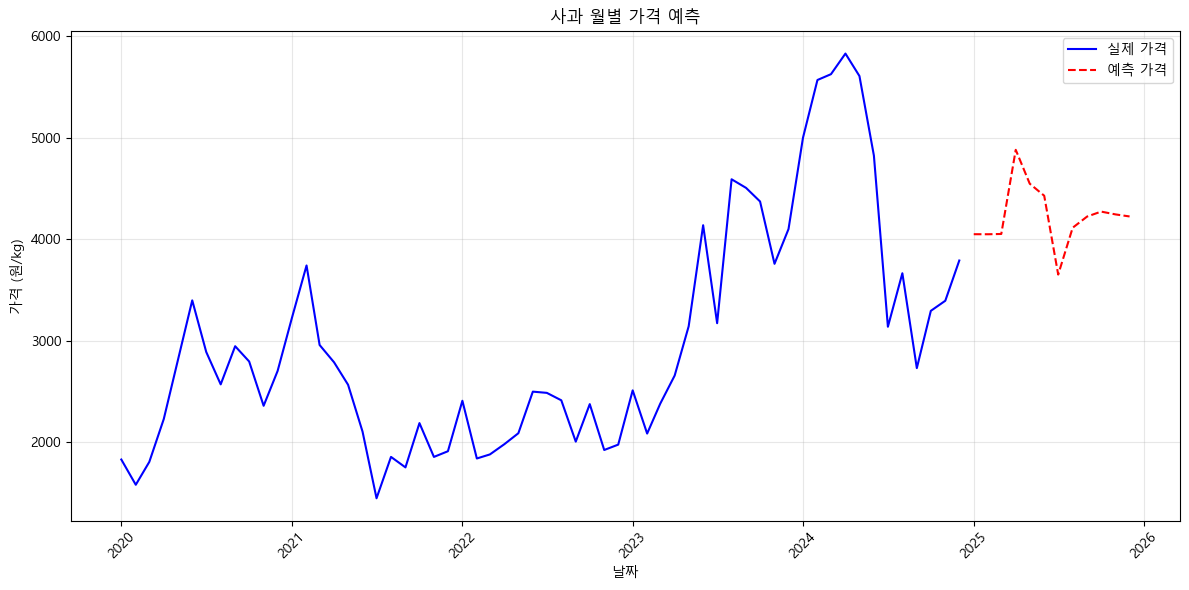

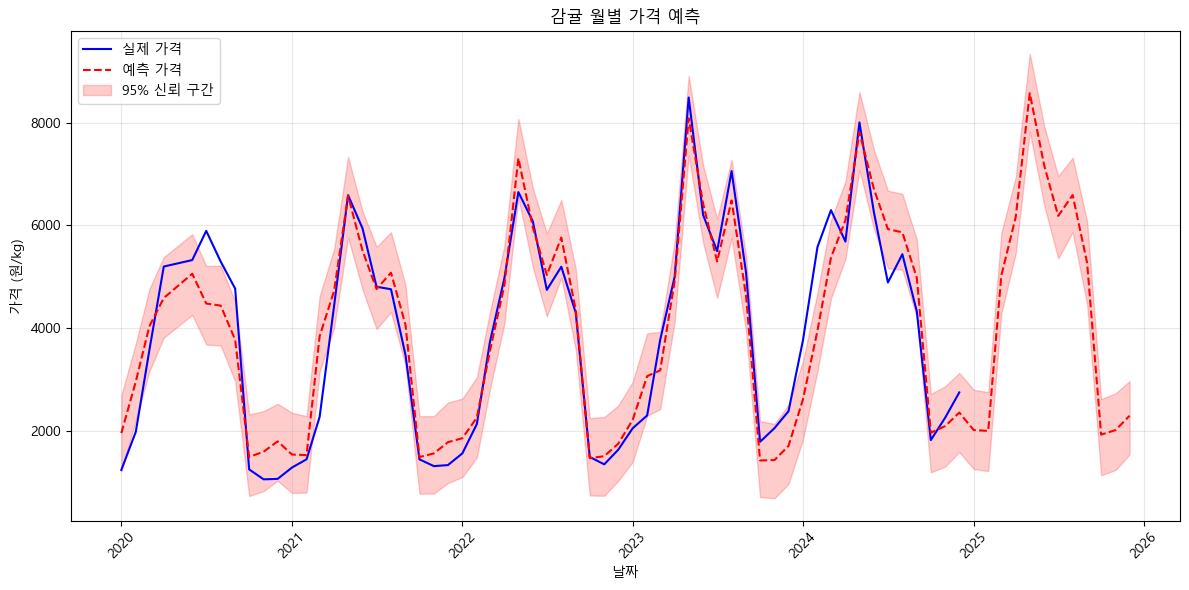

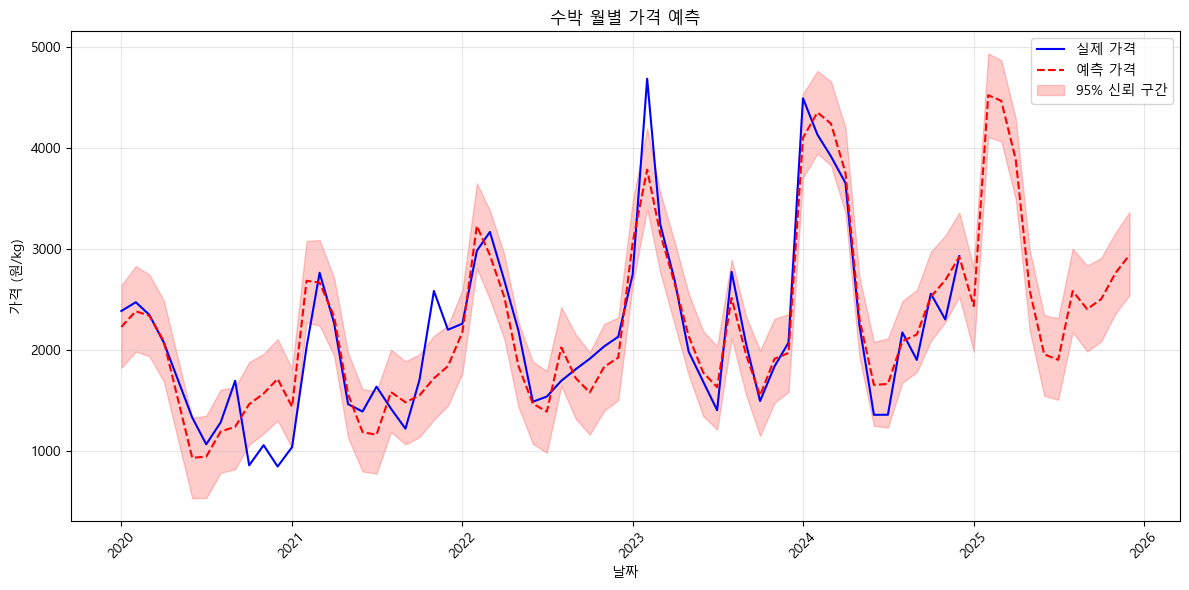

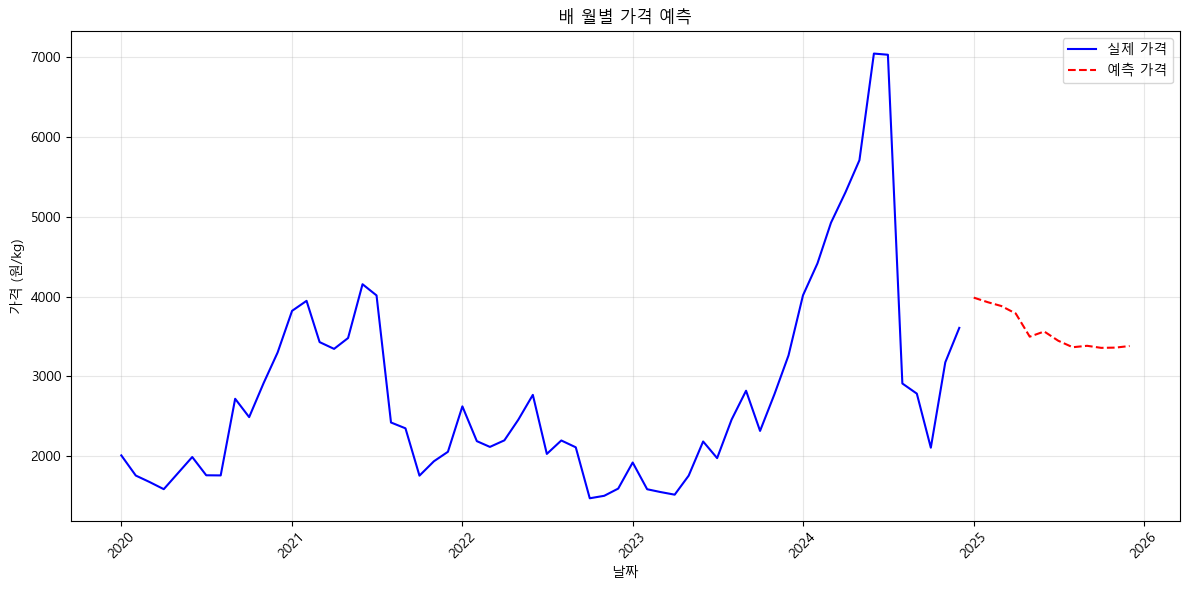

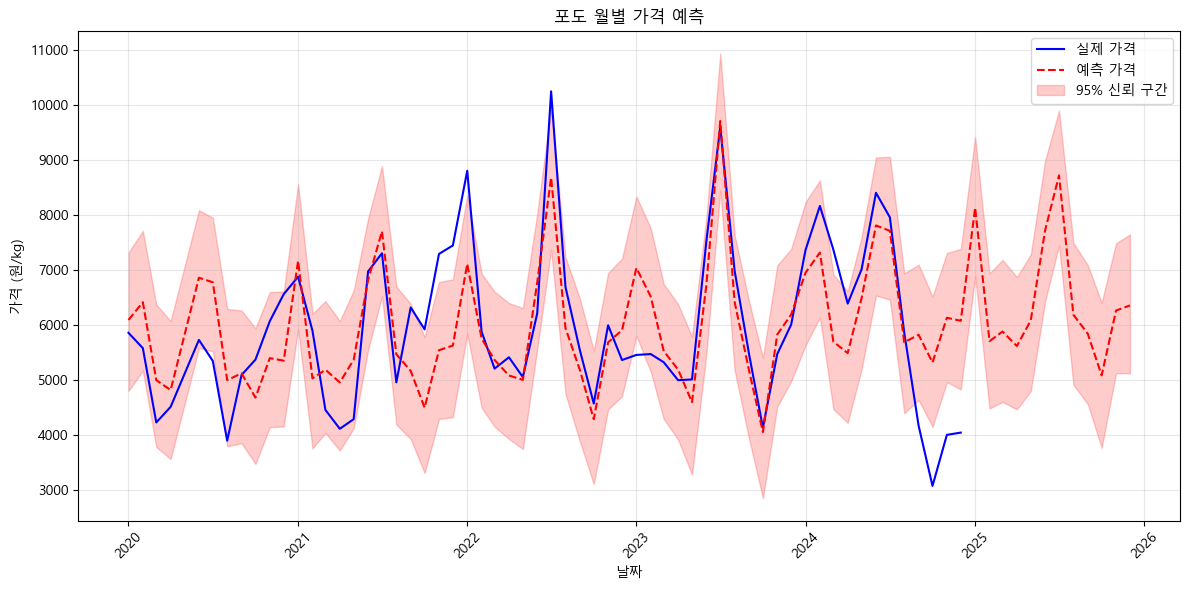

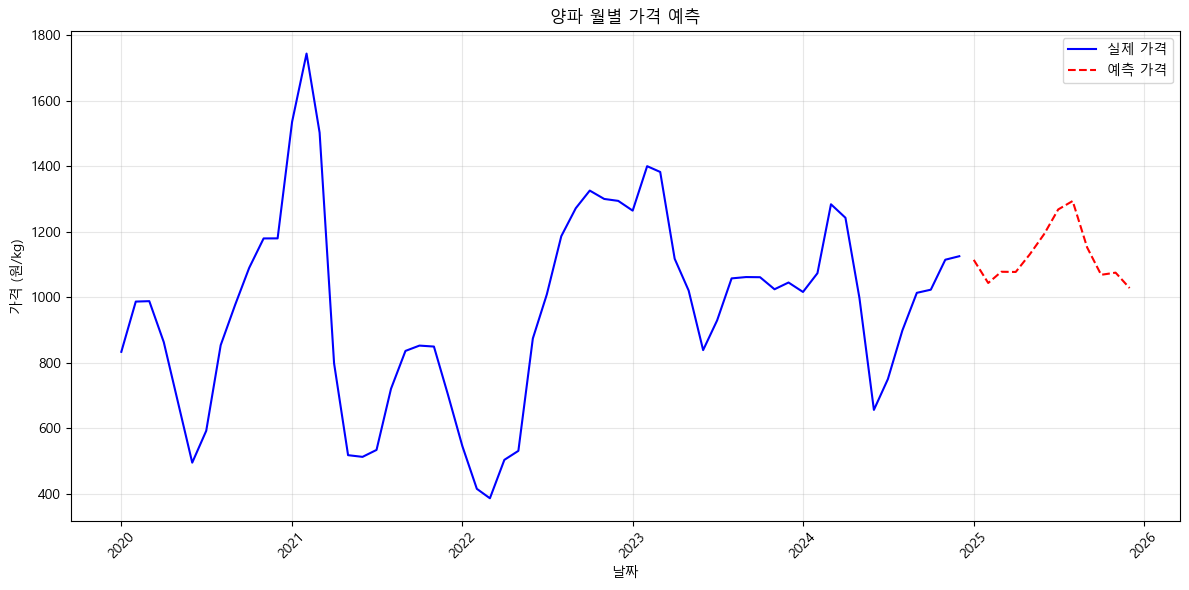

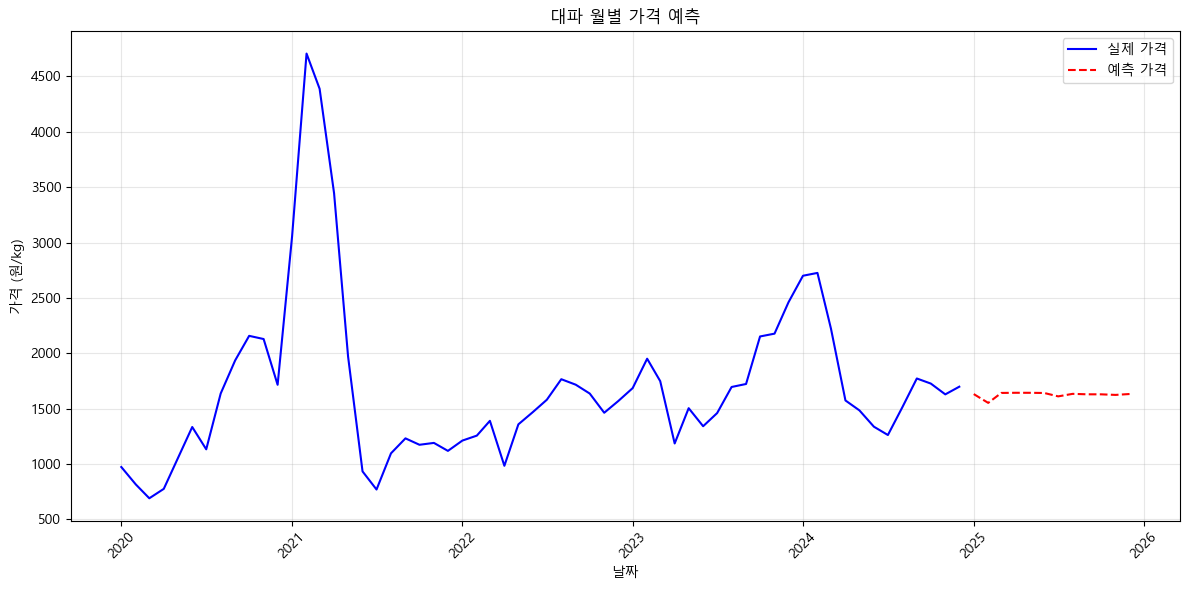

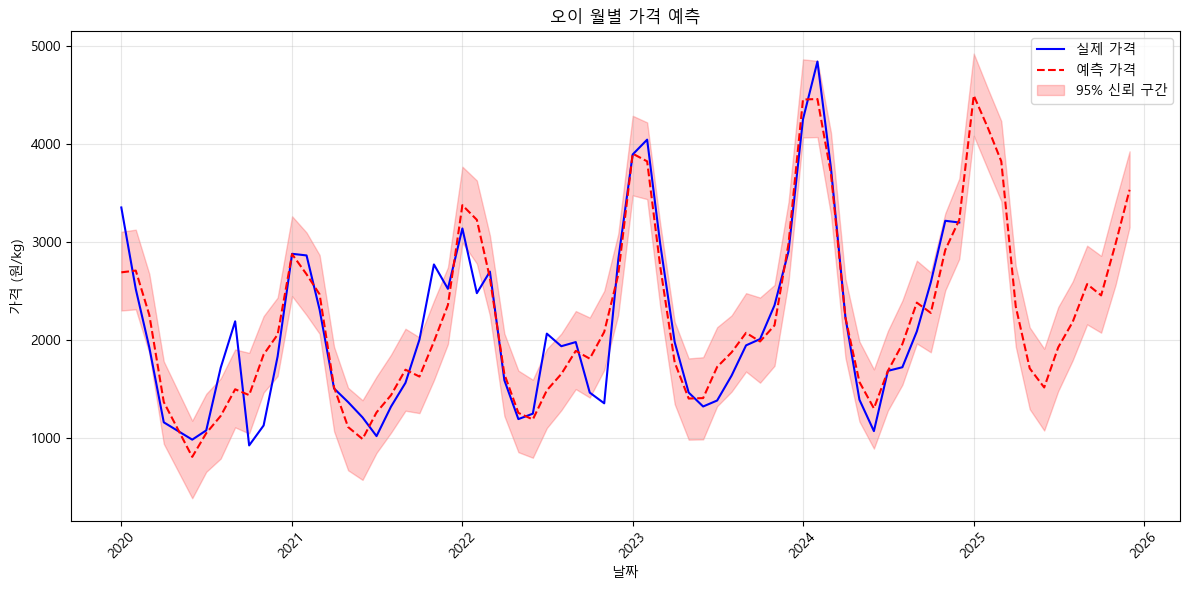

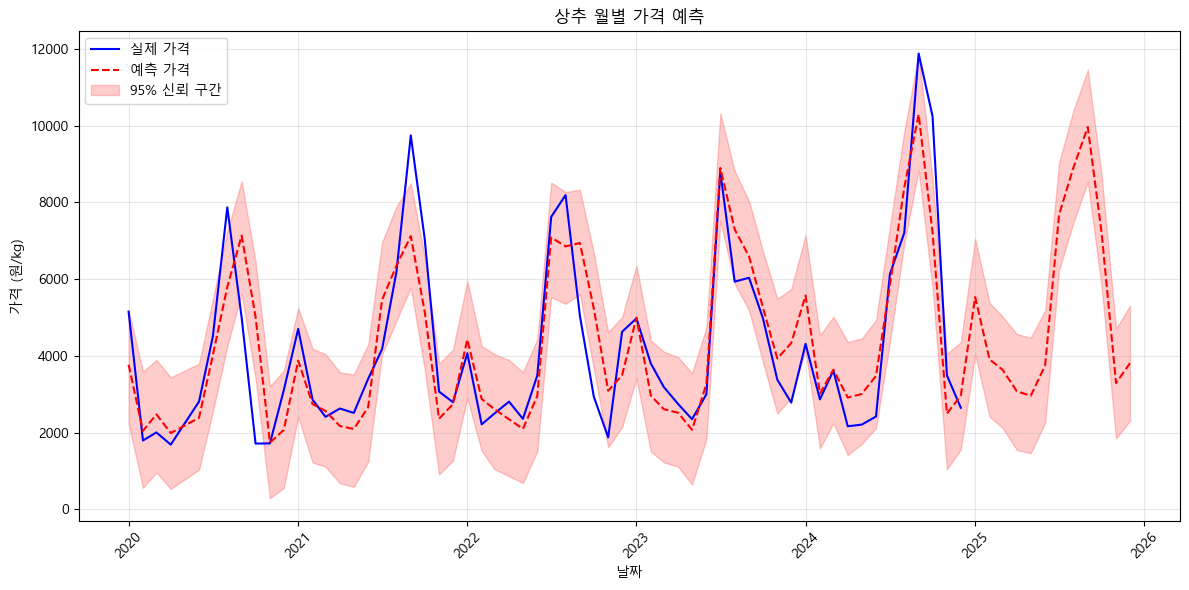

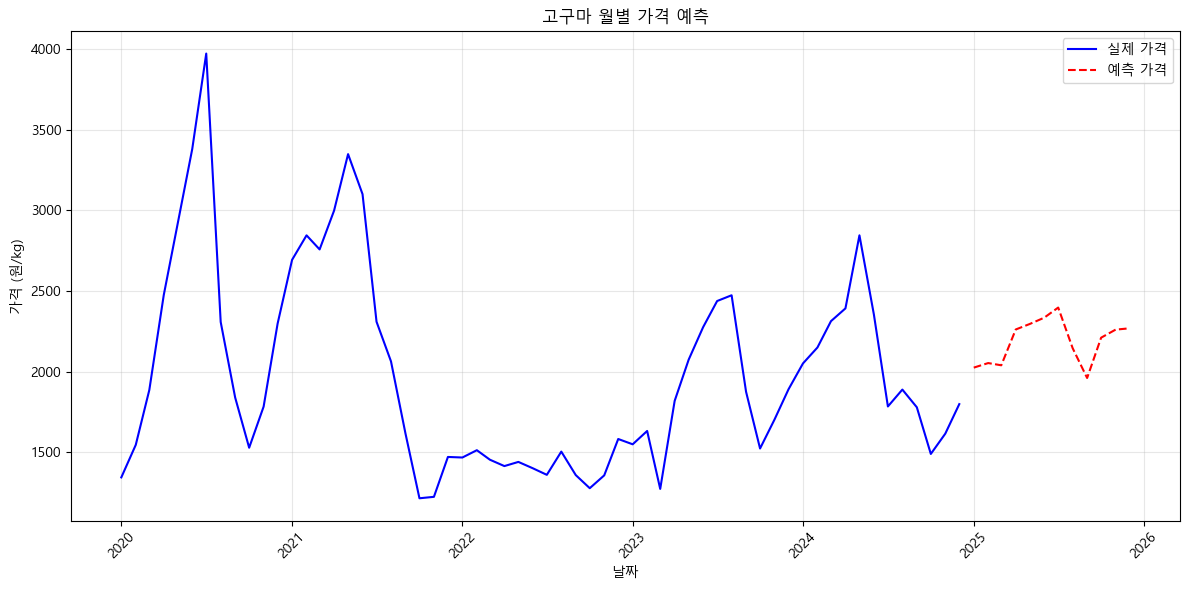

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드
def load_data(file_path):
    """처리된 농산물 월별 가격 데이터를 로드합니다."""
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    return df

# 2. 각 품목별 예측 데이터셋 구성
def prepare_product_data(df, product_name):
    """특정 품목의 예측 데이터셋을 구성합니다."""
    product_df = df[df['product'] == product_name].copy()
    product_df = product_df.sort_values('date')
    
    # 결측치 처리
    for col in ['ma_3', 'ma_6', 'ma_12', 'monthly_change', 'yearly_change', 'volatility']:
        if col in product_df.columns:
            product_df[col] = product_df[col].fillna(0)
    
    return product_df

# 3. 모델 평가 지표 계산
def evaluate_model(y_true, y_pred, model_name):
    """모델 성능 평가 지표를 계산합니다."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    return {
        'model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

# 4. Prophet 모델 학습 및 예측
def train_prophet(train_data, forecast_periods=12):
    """Prophet 모델을 학습하고 예측합니다."""
    # Prophet 데이터 형식으로 변환
    prophet_df = train_data[['date', 'weighted_avg_price']].rename(
        columns={'date': 'ds', 'weighted_avg_price': 'y'})
    
    # 모델 생성 및 학습
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='multiplicative'
    )
    model.fit(prophet_df)
    
    # 예측 기간 설정
    future = model.make_future_dataframe(periods=forecast_periods, freq='MS')
    forecast = model.predict(future)
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 5. XGBoost 모델 학습 및 예측
def train_xgboost(train_data, test_data=None, forecast_periods=12):
    """XGBoost 모델을 학습하고 예측합니다."""
    # 특성 생성
    def create_features(df):
        df = df.copy()
        df['month'] = df['date'].dt.month
        df['quarter'] = df['date'].dt.quarter
        df['year'] = df['date'].dt.year
        df['lag_1'] = df['weighted_avg_price'].shift(1)
        df['lag_2'] = df['weighted_avg_price'].shift(2)
        df['lag_3'] = df['weighted_avg_price'].shift(3)
        df['lag_12'] = df['weighted_avg_price'].shift(12)
        return df
    
    # 훈련 데이터 특성 생성
    train_features = create_features(train_data)
    train_features = train_features.dropna()
    
    # 특성 및 타겟 분리
    features = ['month', 'quarter', 'year', 'lag_1', 'lag_2', 'lag_3', 'lag_12']
    if 'ma_3' in train_features.columns:
        features.extend(['ma_3', 'ma_6', 'ma_12', 'volatility'])
    
    X_train = train_features[features]
    y_train = train_features['weighted_avg_price']
    
    # 모델 학습
    model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # 테스트 데이터가 있으면 예측
    if test_data is not None:
        test_features = create_features(test_data)
        X_test = test_features[features]
        predictions = model.predict(X_test)
        forecast_df = pd.DataFrame({
            'ds': test_data['date'],
            'yhat': predictions
        })
        return forecast_df
    
    # 미래 데이터 생성 및 예측 (재귀적 예측)
    last_date = train_data['date'].iloc[-1]
    future_dates = pd.date_range(start=pd.Timestamp(last_date) + pd.DateOffset(months=1), 
                                periods=forecast_periods, freq='MS')
    
    future_df = pd.DataFrame({'date': future_dates})
    future_df['weighted_avg_price'] = np.nan
    future_df['month'] = future_df['date'].dt.month
    future_df['quarter'] = future_df['date'].dt.quarter
    future_df['year'] = future_df['date'].dt.year
    
    # 최근 데이터 가져오기
    last_values = train_features.tail(12)['weighted_avg_price'].values
    
    # 재귀적으로 미래 예측
    for i in range(forecast_periods):
        if i == 0:
            future_df.loc[i, 'lag_1'] = train_features['weighted_avg_price'].iloc[-1]
            future_df.loc[i, 'lag_2'] = train_features['weighted_avg_price'].iloc[-2]
            future_df.loc[i, 'lag_3'] = train_features['weighted_avg_price'].iloc[-3]
            
            # 작년 같은 달 가격
            month_i = future_df.loc[i, 'month']
            last_year_same_month = train_features[train_features['date'].dt.month == month_i].tail(1)
            if not last_year_same_month.empty:
                future_df.loc[i, 'lag_12'] = last_year_same_month['weighted_avg_price'].values[0]
            else:
                future_df.loc[i, 'lag_12'] = train_features['weighted_avg_price'].mean()
            
            if 'ma_3' in train_features.columns:
                future_df.loc[i, 'ma_3'] = last_values[-3:].mean()
                future_df.loc[i, 'ma_6'] = last_values[-6:].mean() if len(last_values) >= 6 else last_values.mean()
                future_df.loc[i, 'ma_12'] = last_values.mean()
                future_df.loc[i, 'volatility'] = last_values[-3:].std()
        else:
            future_df.loc[i, 'lag_1'] = future_df.loc[i-1, 'weighted_avg_price']
            
            if i >= 2:
                future_df.loc[i, 'lag_2'] = future_df.loc[i-2, 'weighted_avg_price']
            else:
                future_df.loc[i, 'lag_2'] = train_features['weighted_avg_price'].iloc[-1]
                
            if i >= 3:
                future_df.loc[i, 'lag_3'] = future_df.loc[i-3, 'weighted_avg_price']
            else:
                future_df.loc[i, 'lag_3'] = train_features['weighted_avg_price'].iloc[-1]
            
            # 작년 같은 달 가격 (12개월 이전 예측값 또는 실제값)
            if i >= 12:
                future_df.loc[i, 'lag_12'] = future_df.loc[i-12, 'weighted_avg_price']
            else:
                month_i = future_df.loc[i, 'month']
                last_year_same_month = train_features[train_features['date'].dt.month == month_i].tail(1)
                if not last_year_same_month.empty:
                    future_df.loc[i, 'lag_12'] = last_year_same_month['weighted_avg_price'].values[0]
                else:
                    future_df.loc[i, 'lag_12'] = train_features['weighted_avg_price'].mean()
            
            if 'ma_3' in train_features.columns:
                # 이동평균 계산
                vals = []
                for j in range(1, 4):
                    if i-j >= 0:
                        vals.append(future_df.loc[i-j, 'weighted_avg_price'])
                    else:
                        vals.append(train_features['weighted_avg_price'].iloc[-(j-i)-1])
                
                future_df.loc[i, 'ma_3'] = np.mean(vals)
                
                # ma_6 계산
                vals = []
                for j in range(1, 7):
                    if i-j >= 0:
                        vals.append(future_df.loc[i-j, 'weighted_avg_price'])
                    else:
                        vals.append(train_features['weighted_avg_price'].iloc[-(j-i)-1])
                
                future_df.loc[i, 'ma_6'] = np.mean(vals)
                
                # ma_12 계산
                vals = []
                for j in range(1, 13):
                    if i-j >= 0:
                        vals.append(future_df.loc[i-j, 'weighted_avg_price'])
                    else:
                        vals.append(train_features['weighted_avg_price'].iloc[-(j-i)-1])
                
                future_df.loc[i, 'ma_12'] = np.mean(vals)
                future_df.loc[i, 'volatility'] = np.std(vals[:3])
        
        # 현재 달 예측
        X_pred = future_df.loc[i:i, features]
        pred = model.predict(X_pred)[0]
        future_df.loc[i, 'weighted_avg_price'] = pred
    
    forecast_df = pd.DataFrame({
        'ds': future_df['date'],
        'yhat': future_df['weighted_avg_price']
    })
    
    return forecast_df

# 6. 교차 검증 및 모델 비교
def cross_validate_models(product_df, forecast_periods=12, n_splits=3):
    """시계열 교차 검증을 통해 모델 성능을 평가합니다."""
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=forecast_periods)
    results = []
    
    # 필요한 특성이 없는 경우 기본 특성 생성
    if 'ma_3' not in product_df.columns:
        product_df['ma_3'] = product_df['weighted_avg_price'].rolling(window=3).mean()
        product_df['ma_6'] = product_df['weighted_avg_price'].rolling(window=6).mean()
        product_df['ma_12'] = product_df['weighted_avg_price'].rolling(window=12).mean()
        product_df['volatility'] = product_df['weighted_avg_price'].rolling(window=3).std()
    
    for train_idx, test_idx in tscv.split(product_df):
        train_data = product_df.iloc[train_idx].copy()
        test_data = product_df.iloc[test_idx].copy()
        
        # 충분한 훈련 데이터가 있는지 확인
        if len(train_data) < 24:  # 최소 2년 데이터 필요
            print("훈련 데이터가 부족합니다. 최소 24개월 필요.")
            continue
        
        try:
            # 1. Prophet
            prophet_forecast = train_prophet(train_data, forecast_periods=len(test_data))
            prophet_forecast = prophet_forecast.rename(columns={'ds': 'date'})
            
            prophet_eval = test_data[['date', 'weighted_avg_price']].merge(
                prophet_forecast[['date', 'yhat']], on='date', how='left')
            
            prophet_metrics = evaluate_model(
                prophet_eval['weighted_avg_price'],
                prophet_eval['yhat'],
                'Prophet'
            )
            results.append(prophet_metrics)
            
            # 2. XGBoost
            xgb_forecast = train_xgboost(train_data, test_data=test_data)
            xgb_forecast = xgb_forecast.rename(columns={'ds': 'date'})
            
            xgb_eval = test_data[['date', 'weighted_avg_price']].merge(
                xgb_forecast[['date', 'yhat']], on='date', how='left')
            
            xgb_metrics = evaluate_model(
                xgb_eval['weighted_avg_price'],
                xgb_eval['yhat'],
                'XGBoost'
            )
            results.append(xgb_metrics)
        
        except Exception as e:
            print(f"교차 검증 중 오류 발생: {e}")
    
    # 모델별 평균 성능 계산
    results_df = pd.DataFrame(results)
    avg_results = results_df.groupby('model').mean().reset_index()
    
    return avg_results

# 7. 최종 예측 함수
def predict_future_price(product_df, best_model, forecast_periods=12):
    """최적 모델을 사용하여 미래 가격 예측"""
    
    if best_model == 'Prophet':
        forecast = train_prophet(product_df, forecast_periods=forecast_periods)
    elif best_model == 'XGBoost':
        forecast = train_xgboost(product_df, forecast_periods=forecast_periods)
    else:
        raise ValueError(f"지원하지 않는 모델: {best_model}")
    
    return forecast

# 8. 예측 결과 시각화
def plot_forecast(product_df, forecast_df, product_name):

        # 한글 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    """예측 결과 시각화"""
    plt.figure(figsize=(12, 6))
    
    # 과거 데이터 플롯
    plt.plot(product_df['date'], product_df['weighted_avg_price'], 
             label='실제 가격', color='blue')
    
    # 미래 예측 플롯
    forecast_dates = forecast_df['ds'] if 'ds' in forecast_df.columns else forecast_df['date']
    plt.plot(forecast_dates, forecast_df['yhat'], 
             label='예측 가격', color='red', linestyle='--')
    
    # 신뢰 구간이 있는 경우 플롯
    if 'yhat_lower' in forecast_df.columns and 'yhat_upper' in forecast_df.columns:
        plt.fill_between(forecast_dates, 
                         forecast_df['yhat_lower'], 
                         forecast_df['yhat_upper'], 
                         color='red', alpha=0.2, label='95% 신뢰 구간')
    
    plt.title(f'{product_name} 월별 가격 예측')
    plt.xlabel('날짜')
    plt.ylabel('가격 (원/kg)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig(f'{product_name}_forecast.png')
    return plt

# 9. 메인 실행 함수
def main():
    # 설정
    data_file = '시세 예측용 데이터/processed_monthly_agricultural_prices.csv'
    target_products = ['사과', '감귤', '수박', '배', '포도', '양파', '대파', '오이', '상추', '고구마']
    forecast_periods = 12  # 1년 예측
    
    # 데이터 로드
    print("데이터 로드 중...")
    df = load_data(data_file)
    
    # 예측 결과 저장
    all_predictions = {}
    
    for product in target_products:
        print(f"\n{product} 예측 시작...")
        
        # 품목 데이터 준비
        product_df = prepare_product_data(df, product)
        
        if len(product_df) < 36:  # 최소 3년 데이터 필요
            print(f"{product}의 데이터가 부족합니다. 최소 36개월 필요.")
            continue
        
        # 교차 검증으로 최적 모델 선택
        print("모델 교차 검증 중...")
        model_metrics = cross_validate_models(product_df, forecast_periods=6, n_splits=3)
        print("\n모델 성능 비교:")
        print(model_metrics)
        
        # MAPE 기준 최적 모델 선택
        best_model = model_metrics.loc[model_metrics['MAPE'].idxmin(), 'model']
        print(f"\n최적 모델: {best_model} (MAPE: {model_metrics['MAPE'].min():.2f}%)")
        
        # 최종 예측
        print("2025년 월별 가격 예측 중...")
        forecast = predict_future_price(product_df, best_model, forecast_periods=12)
        
        # 결과 저장
        forecast['product'] = product
        if 'ds' in forecast.columns:
            forecast = forecast.rename(columns={'ds': 'date'})
        
        all_predictions[product] = forecast
        
        # 시각화
        plot_forecast(product_df, forecast, product)
        print(f"{product} 예측 완료 및 그래프 저장")
    
    # 모든 예측 결과 통합
    all_forecasts = pd.concat([df for df in all_predictions.values()])
    all_forecasts.to_csv('agricultural_price_forecasts_2025.csv', index=False)
    print("\n모든 예측 완료! 결과가 'agricultural_price_forecasts_2025.csv'에 저장되었습니다.")

if __name__ == "__main__":
    main()